In [ ]:
%pip install -q sklearn matplotlib numpy torch

# Importações

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Gerar o conjunto de dados

In [ ]:
X, y = make_moons(
    n_samples=500,
    noise=0.2, 
    random_state=42
    )

Visualizar os dados

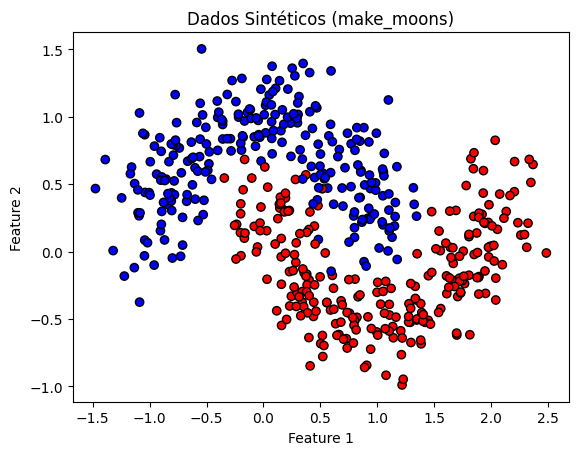

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados Sintéticos (make_moons)')
plt.show()

# Dividir os dados em treino, validação e teste

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Proporção dos dados:")
print(f"Treino: {X_train.shape[0]/X.shape[0]:.2f}")
print(f"Validação: {X_val.shape[0]/X.shape[0]:.2f}")
print(f"Teste: {X_test.shape[0]/X.shape[0]:.2f}")

Proporção dos dados:
Treino: 0.70
Validação: 0.15
Teste: 0.15


# Implementação da MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

Converter os dados para tensores

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Treinar modelos com diferentes números de neurônios

In [ ]:

def calculate_val_loss(model, X_val_tensor, y_val_tensor, criterion = nn.BCELoss()):
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)
    return val_outputs, val_loss

def train_model(hidden_dim, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, num_epochs=1000):
    model = MLP(input_dim=2, hidden_dim=hidden_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            _, val_loss = calculate_val_loss(model, X_val_tensor, y_val_tensor, criterion)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses, val_losses, model

hidden_dims = [5, 10, 20, 50]
results = {}

for hidden_dim in hidden_dims:
    print(f'\nTreinando modelo com {hidden_dim} neurônios na camada oculta')
    train_losses, val_losses, model = train_model(hidden_dim, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor)
    results[hidden_dim] = {'train_losses': train_losses, 'val_losses': val_losses, 'model': model}


Treinando modelo com 5 neurônios na camada oculta
Epoch [100/1000], Loss: 0.3029, Val Loss: 0.2838
Epoch [200/1000], Loss: 0.2168, Val Loss: 0.1988
Epoch [300/1000], Loss: 0.1429, Val Loss: 0.1335
Epoch [400/1000], Loss: 0.0998, Val Loss: 0.0905
Epoch [500/1000], Loss: 0.0790, Val Loss: 0.0711
Epoch [600/1000], Loss: 0.0693, Val Loss: 0.0601
Epoch [700/1000], Loss: 0.0640, Val Loss: 0.0540
Epoch [800/1000], Loss: 0.0608, Val Loss: 0.0498
Epoch [900/1000], Loss: 0.0586, Val Loss: 0.0473
Epoch [1000/1000], Loss: 0.0569, Val Loss: 0.0454

Treinando modelo com 10 neurônios na camada oculta
Epoch [100/1000], Loss: 0.2826, Val Loss: 0.2603
Epoch [200/1000], Loss: 0.2798, Val Loss: 0.2570
Epoch [300/1000], Loss: 0.2749, Val Loss: 0.2524
Epoch [400/1000], Loss: 0.2636, Val Loss: 0.2411
Epoch [500/1000], Loss: 0.2552, Val Loss: 0.2315
Epoch [600/1000], Loss: 0.2511, Val Loss: 0.2264
Epoch [700/1000], Loss: 0.2491, Val Loss: 0.2237
Epoch [800/1000], Loss: 0.2478, Val Loss: 0.2222
Epoch [900/100

Plotar as curvas de perda

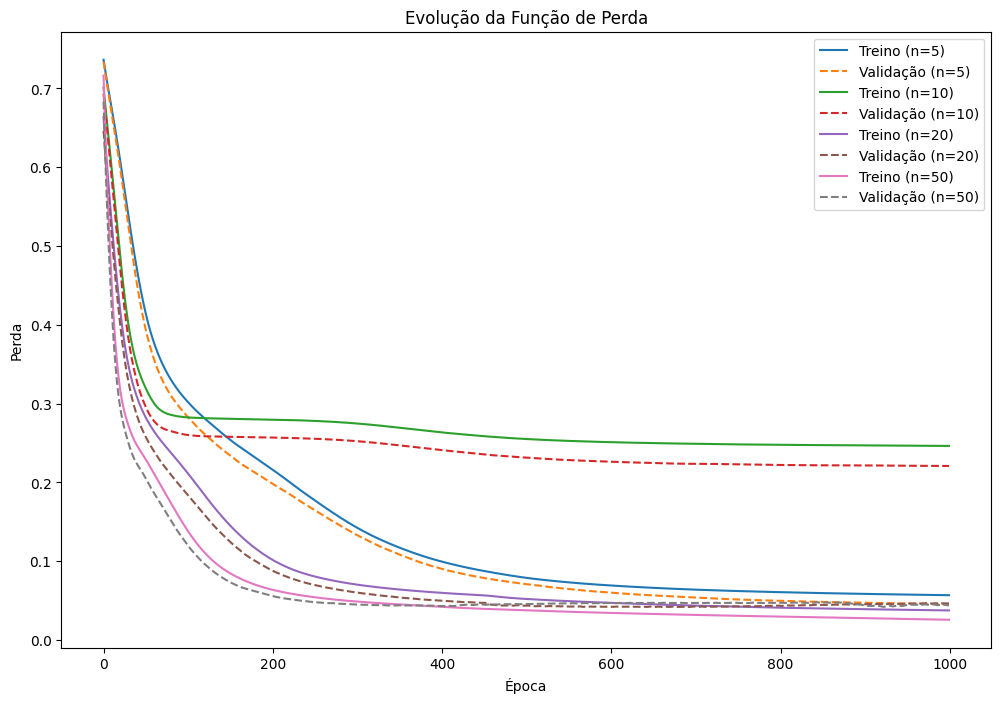

In [ ]:
plt.figure(figsize=(12, 8))
for hidden_dim in hidden_dims:
    plt.plot(results[hidden_dim]['train_losses'], label=f'Treino (n={hidden_dim})')
    plt.plot(results[hidden_dim]['val_losses'], '--', label=f'Validação (n={hidden_dim})')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Evolução da Função de Perda')
plt.legend()
plt.show()

Escolher o melhor número de neurônios

In [ ]:
best_hidden_dim = min(results, key=lambda k: min(results[k]['val_losses']))
best_model = results[best_hidden_dim]['model']
print(f'Melhor número de neurônios: {best_hidden_dim}')

Melhor número de neurônios: 20


Avaliar o melhor modelo no conjunto de teste

In [ ]:
from utils import accuracy
criterion = nn.BCELoss()

best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor)
    test_acc = accuracy(y_test_tensor, y_test_pred)

print(f'Perda no conjunto de teste: {test_loss.item():.4f}')
print(f'Acurácia no conjunto de teste: {test_acc.item() * 100:.2f}%')


Perda no conjunto de teste: 0.0372
Acurácia no conjunto de teste: 98.67%


Plot da fronteira de decisão

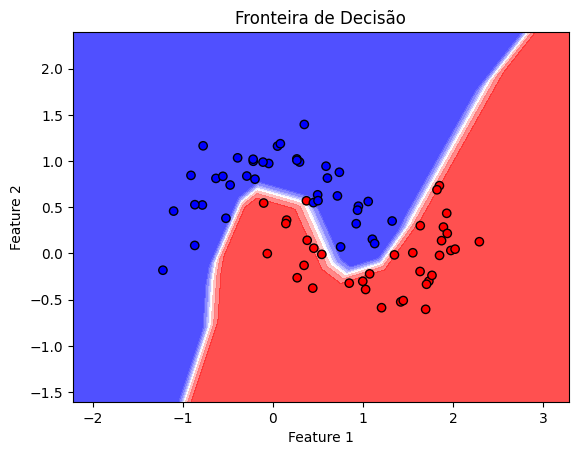

In [ ]:
from utils import plot_decision_boundary

plot_decision_boundary(best_model, X_test, y_test)